## Warmup 1: Write code to answer the following questions about `english_dict`

In [1]:
english_dict = {
    "shenanigans": "silly, high-spirited behavior; mischief.",
    "bamboozle": "fool or cheat (someone).",
    "gubbins": "(objects) of little to no value.",
    "malarkey": "nonsense, rubbish.",
    "gnarly": "gnarled."
}

### Warmup 1a: What is the definition of "gubbins"?

In [2]:
english_dict["gubbins"]

'(objects) of little to no value.'

### Warmup 1b: How many words are in our dictionary?

In [3]:
len(english_dict)

5

### Warmup 1c: Is "badger" in our dictionary?

In [4]:
"badge" in english_dict

False

### Warmup 1d: Is "bamboozle" in our dictionary?

In [5]:
"bamboozle" in english_dict

True

### Warmup 1e: Is there any word which means "nonsense, rubbish." in our dictionary?

In [6]:
"nonsense, rubbish." in english_dict.values()

True

### Warmup 1f: How many definitions have the word "or" appear in them?

In [7]:
non_alpha_chars = [] # empty list
for word in english_dict:
    word_def = english_dict[word]
    for char in word_def:
        if not char.isalpha():
            non_alpha_chars.append(char) # append all non-alphabetical characters to list
non_alpha_chars = list(set(non_alpha_chars)) # remove duplicates

defs_with_or = 0
for word in english_dict:
    word_def = english_dict[word]
    for char in non_alpha_chars: # loop through list of non-alphabetical characters
        word_def = word_def.replace(char, " ") # replace them with the whitespace character
    if "or" in word_def.split(" "):
        defs_with_or += 1

defs_with_or

1

## Warmup 2: answer these Q's about dictionaries

1. What types can a **key** in a dictionary be?
2. What types can a **value** in a dictionary be?
3. Are dictionaries mutable?

# CS220: Lecture 18


## Learning Objectives
After this lecture you will be able to...
 - Handle key errors with get and pop using default values
 - Understand the idea of nesting data structures
 - Use a dictionary of lists to put rows of data into "buckets"
 - Use a list of dictionaries to represent a table of data.
 - Create a dictionary of dictionaries



### What errors that can occur with get and pop?

In [8]:
suffix = {1:"st", 2:'nd', 3:"rd"}

#### What happens when you try to get a key that is not there? 

In [9]:
# print(suffix[5])  # key errors

#### what happens whey you try to pop a key that is not there?

In [10]:
# suffix.pop(4)     # key errors

### Safe Programming 1

using `in` to detect before getting or popping

In [11]:
if 5 in suffix:
    print(suffix[5])
else:
    print("Skipped!")

Skipped!


In [12]:
if 4 in suffix:
    print(suffix.pop(4))
else:
    print("Skipped!")

Skipped!


### Safe Programming 2

using the second argument of `get` and `pop`

In [13]:
print(suffix.get(5, 'th'))
print(suffix)

th
{1: 'st', 2: 'nd', 3: 'rd'}


In [14]:
print(suffix.pop(5, 'th'))
print(suffix)

th
{1: 'st', 2: 'nd', 3: 'rd'}


# Nesting


Putting one data structure inside of another.

We've done this with control structures...
 - a conditional inside a conditional
 - a loop inside a loop
 - a conditional inside a loop
 - ... and so on...

 
We can also do...
 - a list inside a list
 - a dict inside a dict
 - a list inside a dict
 - ... and so on...

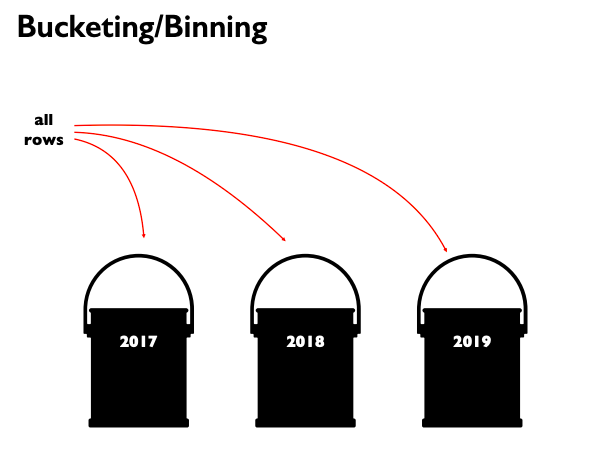



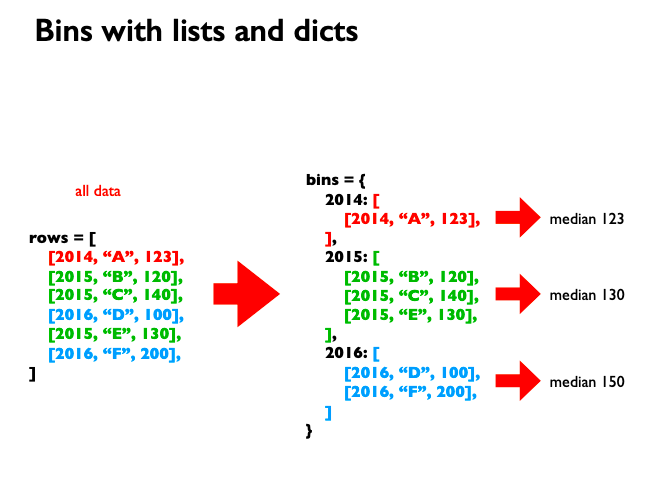

What is it?
 - Start with an empty Dictionary
 - Read a row
  - Keys are entries from one of the colums of the data
  - Each key's associated value is a list of lists
 - Each row of data ends up in some bin

Why bucket data?
 - A way to organize our data, without losing information in the process



## Applications

Let's bucket data from the CS220 Survey.

As a refresher, run the below cells to see some of the data.

In [15]:
import csv

# source:  Automate the Boring Stuff with Python Ch 12
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")  
    exampleReader = csv.reader(exampleFile) 
    exampleData = list(exampleReader)        
    exampleFile.close()  
    return exampleData

survey_csv = process_csv('cs220_survey_data.csv')
survey_header = survey_csv[0]
survey_rows = survey_csv[1:]

In [16]:
survey_header

['section',
 'Lecture',
 'Age',
 'Primary major',
 'Other Primary Major',
 'Other majors',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Pizza topping',
 'Cats or dogs',
 'Runner',
 'Sleep habit',
 'Procrastinator',
 'Song']

In [17]:
survey_rows[0]

['COMP SCI 220:LEC003, COMP SCI 220:LAB333',
 'LEC003',
 '19',
 'Other (please provide details below).',
 'Atmospheric and Oceanic Science',
 '',
 '53703',
 '44.256',
 '-88.409',
 'basil/spinach',
 'cat',
 'No',
 'early bird',
 'Yes',
 'Kanye']

In [18]:
def cell(row_idx, col_name):
    col_idx = survey_header.index(col_name)
    val = survey_rows[row_idx][col_idx]
    if val == "":
        return None
    elif col_name == "Age" or col_name == "Zip Code":
        return int(val)
    elif col_name == "Latitude" or col_name == "Longitude":
        return float(val)
    else:
        return val

## Example 1: Place the data into buckets by lecture

* **Key**:   name of lecture ("LEC001", "LEC002", etc.)
* **Value**: a list of all the rows that go with that lecture (list of lists)

In [19]:
lecture_sections = {}
for i in range(len(survey_rows)):
    current_student = survey_rows[i]
    current_lecture = cell(i, 'Lecture')
    if not current_lecture in lecture_sections:
        lecture_sections[current_lecture] = []
    lecture_sections[current_lecture].append(current_student)
    
lecture_sections

{'LEC003': [['COMP SCI 220:LEC003, COMP SCI 220:LAB333',
   'LEC003',
   '19',
   'Other (please provide details below).',
   'Atmospheric and Oceanic Science',
   '',
   '53703',
   '44.256',
   '-88.409',
   'basil/spinach',
   'cat',
   'No',
   'early bird',
   'Yes',
   'Kanye'],
  ['COMP SCI 220:LAB335, COMP SCI 220:LEC003',
   'LEC003',
   '',
   'Data Science',
   '',
   '',
   '53715',
   '40.7128',
   '-74.006',
   'sausage',
   'dog',
   'Yes',
   'early bird',
   'Yes',
   'Post malone -overdrive'],
  ['COMP SCI 220:LEC003, COMP SCI 220:LAB335',
   'LEC003',
   '',
   'Business: Information Systems',
   '',
   '',
   '54601',
   '25.7617',
   '-80.1918',
   'mushroom',
   'cat',
   'No',
   'night owl',
   'Yes',
   'bando playboy carti'],
  ['COMP SCI 220:LEC003, COMP SCI 220:LAB333',
   'LEC003',
   '19',
   'Statistics',
   '',
   'data science',
   '53703',
   '43.0766',
   '-89.3972',
   'pineapple',
   'dog',
   'Yes',
   'night owl',
   'Yes',
   'Nikes on my feet - 

In [20]:
print(sorted(list(lecture_sections.keys()))) # print all the lecture sections
print(len(lecture_sections['LEC003'])) # print how many LEC003 students completed the survey
print(lecture_sections['LEC002'][2]) # print the third student to complete the survey for LEC002

['LEC001', 'LEC002', 'LEC003', 'LEC004', 'LEC005']
230
['COMP SCI 220:LAB326, COMP SCI 220:LEC002', 'LEC002', '', 'Other (please provide details below).', 'Econ with math emphasis (photography certificate)\n\n\xa0', '', '53703', '-41.2865', '174.7762', 'pineapple', 'neither', 'Yes', 'no preference', 'Maybe', 'None.\xa0']


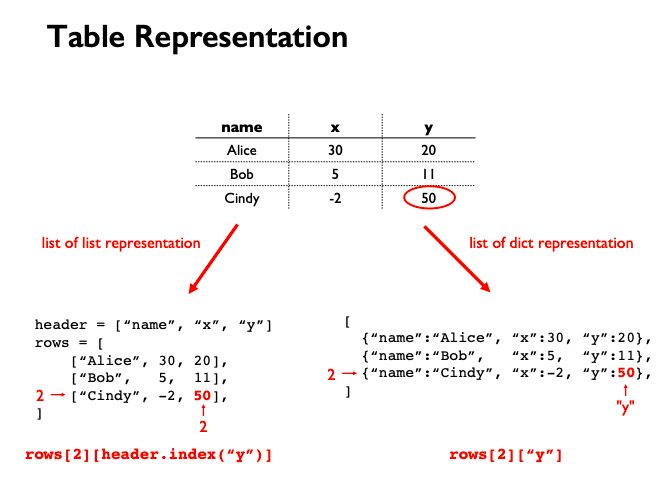
What is it?
 - Start with an empty list
 - Each row of data is one dictionary
    - keys are the column names
    - values are the data in each cell
 - Makes a list of dictionaries

Why put data in table form?
 - It seems redundant, but is used often in computer apps for storing info
 - Its a little easier to access subsets of the data without worrying about the header

In [21]:
survey_header

['section',
 'Lecture',
 'Age',
 'Primary major',
 'Other Primary Major',
 'Other majors',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Pizza topping',
 'Cats or dogs',
 'Runner',
 'Sleep habit',
 'Procrastinator',
 'Song']

In [22]:
# Let's put the student survey data into a list of dictionaries
students_info = [] # list of dictionaries
for i in range(len(survey_rows)):
    current_row = survey_rows[i]
    current_student = {}
    current_student['Lecture'] = cell(i, "Lecture")
    current_student['Age'] = cell(i, "Age")
    current_student['Primary major'] = cell(i, "Primary major")
    current_student['Other Primary Major'] = cell(i, "Other Primary Major")
    current_student['Zip Code'] = cell(i, "Zip Code")
    current_student['Latitude'] = cell(i, "Latitude")
    current_student['Longitude'] = cell(i, "Longitude")
    current_student['Pizza topping'] = cell(i, "Pizza topping")
    current_student['Cats or dogs'] = cell(i, "Cats or dogs")
    current_student['Runner'] = cell(i, "Runner")
    current_student['Sleep habit'] = cell(i, "Sleep habit")
    current_student['Procrastinator'] = cell(i, "Procrastinator")
    current_student['Song'] = cell(i, "Song")
    students_info.append(current_student)
students_info

[{'Lecture': 'LEC003',
  'Age': 19,
  'Primary major': 'Other (please provide details below).',
  'Other Primary Major': 'Atmospheric and Oceanic Science',
  'Zip Code': 53703,
  'Latitude': 44.256,
  'Longitude': -88.409,
  'Pizza topping': 'basil/spinach',
  'Cats or dogs': 'cat',
  'Runner': 'No',
  'Sleep habit': 'early bird',
  'Procrastinator': 'Yes',
  'Song': 'Kanye'},
 {'Lecture': 'LEC004',
  'Age': 19,
  'Primary major': 'Engineering: Biomedical',
  'Other Primary Major': None,
  'Zip Code': 53711,
  'Latitude': 51.5072,
  'Longitude': -0.1257,
  'Pizza topping': 'Other',
  'Cats or dogs': 'dog',
  'Runner': 'No',
  'Sleep habit': 'night owl',
  'Procrastinator': 'Yes',
  'Song': 'Eyes Closed by Ed Sheeran\xa0'},
 {'Lecture': 'LEC004',
  'Age': None,
  'Primary major': 'Computer Science',
  'Other Primary Major': None,
  'Zip Code': 53703,
  'Latitude': 37.7749,
  'Longitude': -122.4194,
  'Pizza topping': 'pineapple',
  'Cats or dogs': 'dog',
  'Runner': 'Yes',
  'Sleep habi

In [23]:
print(list(students_info[278].keys())) # print all the keys for a particular student
print(len(students_info)) # print how many students completed the survey
print(students_info[2]['Lecture']) # print the third student to complete the survey's lecture number
print(students_info[83]['Age']) # print a particular student's age
print(type(students_info[83]['Age'])) # print a particular student's age (type)

['Lecture', 'Age', 'Primary major', 'Other Primary Major', 'Zip Code', 'Latitude', 'Longitude', 'Pizza topping', 'Cats or dogs', 'Runner', 'Sleep habit', 'Procrastinator', 'Song']
1019
LEC004
18
<class 'int'>


## Example 2: Do the same thing as above but without hardcoding the column names

In [24]:
# Let's put the student survey data into a list of dictionaries
students_info = list() # list of dictionaries
for i in range(len(survey_rows)):
    current_row = survey_rows[i]
    current_student = {}
    for col_name in survey_header:
        current_student[col_name] = cell(i, col_name)
    students_info.append(current_student)
students_info

[{'section': 'COMP SCI 220:LEC003, COMP SCI 220:LAB333',
  'Lecture': 'LEC003',
  'Age': 19,
  'Primary major': 'Other (please provide details below).',
  'Other Primary Major': 'Atmospheric and Oceanic Science',
  'Other majors': None,
  'Zip Code': 53703,
  'Latitude': 44.256,
  'Longitude': -88.409,
  'Pizza topping': 'basil/spinach',
  'Cats or dogs': 'cat',
  'Runner': 'No',
  'Sleep habit': 'early bird',
  'Procrastinator': 'Yes',
  'Song': 'Kanye'},
 {'section': 'COMP SCI 220:LAB344, COMP SCI 220:LEC004',
  'Lecture': 'LEC004',
  'Age': 19,
  'Primary major': 'Engineering: Biomedical',
  'Other Primary Major': None,
  'Other majors': None,
  'Zip Code': 53711,
  'Latitude': 51.5072,
  'Longitude': -0.1257,
  'Pizza topping': 'Other',
  'Cats or dogs': 'dog',
  'Runner': 'No',
  'Sleep habit': 'night owl',
  'Procrastinator': 'Yes',
  'Song': 'Eyes Closed by Ed Sheeran\xa0'},
 {'section': 'COMP SCI 220:LAB342, COMP SCI 220:LEC004',
  'Lecture': 'LEC004',
  'Age': None,
  'Primary

## Example 3: Dictionary of Dictionaries

In [25]:
nested_english_dict = {
    "shenanigans": {
        "definition": "silly or high-spirited behavior; mischief.",
        "usage": "widespread financial shenanigans had ruined the fortunes of many",
        "fun_to_say": 7 # on a scale of 1-10
    },
    "bamboozle": {
        "definition": "fool or cheat (someone).",
        "usage": "Tom Sawyer bamboozled the neighborhood boys into painting for him",
        "fun_to_say": 8 # on a scale of 1-10
    },
    "gubbins": {
        "definition": "(objects) of little to no value.",
        "usage": "I cleared all the gubbins off my desk before I started working",
        "fun_to_say": 10 # on a scale of 1-10
    },
    "malarkey": {
        "definition": "meaningless talk; nonsense.",
        "usage": "don't give me that malarkey",
        "fun_to_say": 5 # on a scale of 1-10
    },
    "gnarly": {
        "definition": "gnarled.",
        "usage": "twisted trees and gnarly roots",
        "fun_to_say": 2 # on a scale of 1-10
    }
}

#### Get the definition, usage, and score of 'malarkey'

In [26]:
nested_english_dict['malarkey']

{'definition': 'meaningless talk; nonsense.',
 'usage': "don't give me that malarkey",
 'fun_to_say': 5}

#### Get the definition of 'shenanigans'

In [27]:
nested_english_dict['shenanigans']['definition']

'silly or high-spirited behavior; mischief.'

#### Get the usage of 'gubbins'

In [28]:
nested_english_dict['gubbins']['usage']

'I cleared all the gubbins off my desk before I started working'

#### Print out each word and its corresponding definition

In [29]:
for word in nested_english_dict:
    info = nested_english_dict[word]
    print(word, info['definition'])

shenanigans silly or high-spirited behavior; mischief.
bamboozle fool or cheat (someone).
gubbins (objects) of little to no value.
malarkey meaningless talk; nonsense.
gnarly gnarled.


#### Find the average of `fun_to_say` for all words in dictionary

In [30]:
total = 0
for word in nested_english_dict:
    info = nested_english_dict[word]
    total += info['fun_to_say']

print(total/len(nested_english_dict))

6.4


#### Check whether a user-entered word is fun to say

* If it has a `fun_to_say` of more than 6, print `":)"`
* If it has a `fun_to_say` of less than 6, but more than 3, print `":|"`
* Otherwise, print `":("`

In [31]:
chosen_word = input("Enter a word to lookup: ")
fun_to_say = nested_english_dict.get(chosen_word, {}).get("fun_to_say", 0)
if fun_to_say > 6:
    print(":)")
elif fun_to_say > 3:
    print(":|")
else:
    print(":(")

Enter a word to lookup:  blimey


:(


## More Examples

More Examples of nested dictionaries can be found here: https://www.w3schools.com/python/python_dictionaries_nested.asp

## Example 4: Review

In [32]:
scores = { "bob" : 0,
           "alice": 0 }

def do_set(cmd):
    name = cmd[1]
    score = int(cmd[2])
    scores[name] = score
    
def do_get(cmd):
    name = cmd[1]
    if name in scores:
        print(scores[name])
    else:
        print("unknown name")
    
def do_print():
    for person in scores:
        print(person, ':', scores[person])
        
def do_high():
    # PASS 1: find the best score
    best_player = None
    for player in scores:
        if best_player == None or scores[player] > scores[best_player]:
            best_player = player

    # PASS 2: find all players with the best score
    winners = []
    for player in scores:
        if scores[player] == scores[best_player]:
            winners.append(player)

    if len(winners) == 1:
        print (f"Only winner is: {winners[0]}")
    else:
        print(f"Tie for win between: {', '.join(winners)}")

def do_help():
    print('Commands:')
    print('help')
    print('  print list of commands')
    print('set <name> <score>')
    print('  updates score of player with given name')
    print('get <name>')
    print('  gets the score of player with given name')  
    print('print')
    print('  prints all the scores')
    print('high')
    print('  print high score')
    print('quit')
    print('  quit program')

while True:
    cmd = input('enter a cmd (type "help" for descriptions): ')
    cmd = cmd.strip().lower().split(' ')

    if cmd[0] == 'quit':
        break
    elif cmd[0] == 'help':
        do_help()
    elif cmd[0] == 'print':
        do_print()
    elif cmd[0] == 'set':
        do_set(cmd) # why do we pass cmd here?
    elif cmd[0] == 'get':
        do_get(cmd) # why do we pass cmd here?
    elif cmd[0] == 'high':
        do_high()

print('exiting')

enter a cmd (type "help" for descriptions):  help


Commands:
help
  print list of commands
set <name> <score>
  updates score of player with given name
get <name>
  gets the score of player with given name
print
  prints all the scores
high
  print high score
quit
  quit program


enter a cmd (type "help" for descriptions):  print


bob : 0
alice : 0


enter a cmd (type "help" for descriptions):  set bob 4
enter a cmd (type "help" for descriptions):  get bob


4


enter a cmd (type "help" for descriptions):  print


bob : 4
alice : 0


enter a cmd (type "help" for descriptions):  set chang 10
enter a cmd (type "help" for descriptions):  print


bob : 4
alice : 0
chang : 10


enter a cmd (type "help" for descriptions):  high


Only winner is: chang


enter a cmd (type "help" for descriptions):  set alice 10
enter a cmd (type "help" for descriptions):  high


Tie for win between: alice, chang


enter a cmd (type "help" for descriptions):  quit


exiting
